**Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.**

**Sample Dateset :-**
https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

**1. Load the Dataset**

---



In [18]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Display the first few rows
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


**2. Data Preprocessing**

---



In [19]:
# Drop columns that won't be used
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Encode the target variable
data['Survived'] = data['Survived'].map({0: 0, 1: 1})

# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Display the first few rows of the encoded dataset
print(data_encoded.head())


   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


**3. Split Features and Target**

---



In [20]:
# Split features and target
X = data_encoded.drop('Survived', axis=1)  # Features
y = data_encoded['Survived']  # Target variable

**4. Train-Test Split**

---



In [21]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**5. Create and Train the Decision Tree Classifier**

---



In [22]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
print(y_train.value_counts())

Survived
0    444
1    268
Name: count, dtype: int64


In [29]:
import numpy as np
feature_importance = clf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

      Feature  Importance
5    Sex_male    0.310280
4        Fare    0.256296
1         Age    0.202842
0      Pclass    0.115341
2       SibSp    0.062626
3       Parch    0.027890
7  Embarked_S    0.020056
6  Embarked_Q    0.004669


In [30]:
survived_passengers = data_encoded[data_encoded['Survived'] == 1]
print(survived_passengers.describe())

       Survived      Pclass         Age       SibSp       Parch        Fare
count     342.0  342.000000  342.000000  342.000000  342.000000  342.000000
mean        1.0    1.950292   28.291433    0.473684    0.464912   48.395408
std         0.0    0.863321   13.764425    0.708688    0.771712   66.596998
min         1.0    1.000000    0.420000    0.000000    0.000000    0.000000
25%         1.0    1.000000   21.000000    0.000000    0.000000   12.475000
50%         1.0    2.000000   28.000000    0.000000    0.000000   26.000000
75%         1.0    3.000000   35.000000    1.000000    1.000000   57.000000
max         1.0    3.000000   80.000000    4.000000    5.000000  512.329200


**6. Make Predictions**

---



In [23]:
# Make predictions
y_pred = clf.predict(X_test)

**7. Evaluate the Model**

---



In [24]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179

[[84 21]
 [18 56]]


**8. Visualize the Decision Tree**

---



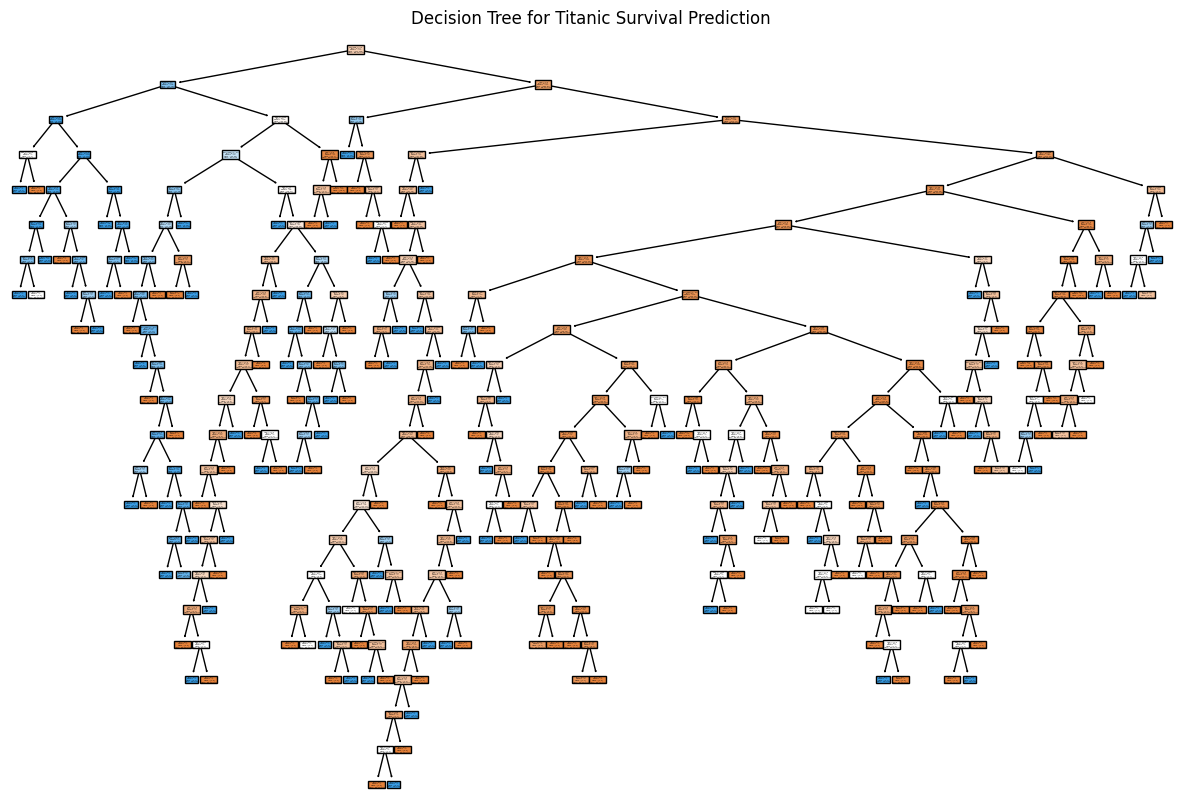

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title("Decision Tree for Titanic Survival Prediction")
plt.show()


** 9. Testing Code with Custom Input**

---



In [31]:
test_data = pd.DataFrame({
    'Pclass': [1, 1],  # Both in 1st class
    'Sex_male': [0, 0],  # Both females
    'Age': [30, 25],  # Young ages
    'SibSp': [0, 1],  # No siblings for the first, one for the second
    'Parch': [0, 1],  # No parents for the first, one for the second
    'Fare': [100, 70],  # Higher fares
    'Embarked_Q': [0, 0],
    'Embarked_S': [1, 1]
})


# Ensure the test data has the same column order as the training data
test_data = test_data.reindex(columns=X.columns)

# Make predictions on the test data
test_predictions = clf.predict(test_data)
print("Test Predictions:", test_predictions)


Test Predictions: [1 0]


**Summary**

---


This process walks you through loading the Titanic dataset, preprocessing the data, training a decision tree classifier, evaluating its performance, and visualizing the tree. Let me know if you need any further assistance!